# MACHINE LEARNING
DONE BY SASWATA KUMAR DASH
REG NO: 21BPS1460

# Importing the Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
%matplotlib inline

# Pre-processing

### Loading the Cifar10 database

In [ ]:
# Setting the name of the classes that will be predicted
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Loading the database
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Image normalization

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_train = X_train / 255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test = X_test / 255.0

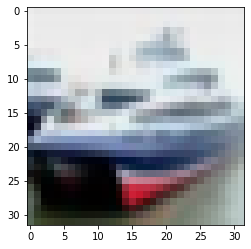

In [ ]:
plt.imshow(X_test[1])

## Building the Convolutional Neural Network

### Defining the model

In [ ]:
model = tf.keras.models.Sequential()

### Added the first convolution layer

Hyper-parameters of the convolution layer:
- filters: 32
- kernel_size (kernel size): 3
- padding: same
- activation function: relu
- input_shape (input layer): (32, 32, 3)

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second convolution layer and the max-pooling layer

Hyper-parameters of the convolution layer:
- filters: 32
- kernel_size (kernel size):3
- padding: same
- activation function: relu

Max-pooling layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third convolution layer

Hyper-parameters of the convolution layer:

     filters: 64
     kernel_size:3
     padding: same
     activation: relu


In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

### Adding the fourth convolution layer and the max pooling layer

Hyper-parameters of the convolution layer:

     filters: 64
     kernel_size:3
     padding: same
     activation: relu

Hyper-parameters of the max pooling layer:

     pool_size: 2
     strides: 2
     padding: valid

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the flattening layer

In [ ]:
model.add(tf.keras.layers.Flatten())

### Adding the first dense (fully-connected) layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation function: relu

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the output layer

Output layer hyper-parameters:

  - units/neurons: 10 (number of classes)
  - activation: softmax

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

### Compiling the model

#### sparse_categorical_accuracy


In [ ]:
# 0 0 0 1 0 0 0 0 0 0
y_test[0]

array([3], dtype=uint8)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3665 - sparse_categorical_accuracy: 0.5083
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8957 - sparse_categorical_accuracy: 0.6872
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7343 - sparse_categorical_accuracy: 0.7426
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6138 - sparse_categorical_accuracy: 0.7862
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5201 - sparse_categorical_accuracy: 0.8180
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4345 - sparse_categorical_accuracy: 0.8458
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3578 - sparse_categorical_accuracy: 0.8724
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2967 - sparse_categorical_accuracy: 0.8958
Epoch 9/10
1563/1563 [==========

### Evaluating the model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1864 - sparse_categorical_accuracy: 0.7283


In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7282999753952026


In [ ]:
test_loss

1.1864194869995117

### Visualizing the results / Output

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [ ]:
import random
def showResults():
    x = random.randint(0,len(X_test))
    plt.imshow(X_test[x])
    temp=X_test[x].reshape((1,32,32,3))
    pred=model.predict(temp)
    for id,i in enumerate(pred[0]):
      if i>0.5:
        plt.title(class_names[id])
        print()
    plt.show()

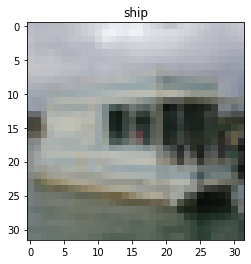

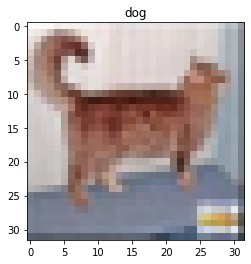

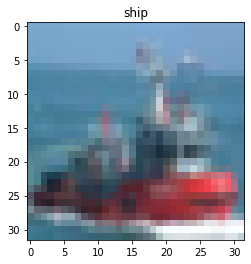

In [ ]:
showResults()
showResults()
showResults()